In [1]:
import pandas as pd
import numpy as np
import pickle
import re
import datetime as dt

from pybaseball import *


games_18 = pd.read_pickle('../pickles/2018_apps_ids.pkl')
games_17 = pd.read_pickle('../pickles/2017_apps_ids.pkl')
games_16 = pd.read_pickle('../pickles/2016_apps_ids.pkl')
games_15 = pd.read_pickle('../pickles/2015_apps_ids.pkl')


games_18['date'] = pd.to_datetime(games_18['date'])
games_17['date'] = pd.to_datetime(games_17['date'])
games_16['date'] = pd.to_datetime(games_16['date'])
games_15['date'] = pd.to_datetime(games_15['date'])


games_18 = games_18.sort_values(by=['key_mlbam', 'date'])
games_17 = games_17.sort_values(by=['key_mlbam', 'date'])
games_16 = games_16.sort_values(by=['key_mlbam', 'date'])
games_15 = games_15.sort_values(by=['key_mlbam', 'date'])

inj_18 = pd.read_pickle('../pickles/2018_inj_ids.pkl')
inj_17 = pd.read_pickle('../pickles/2017_inj_ids.pkl')
inj_16 = pd.read_pickle('../pickles/2016_inj_ids.pkl')
inj_15 = pd.read_pickle('../pickles/2015_inj_ids.pkl')

merge_18 = games_18.merge(inj_18, on='key_mlbam', how='left')
merge_17 = games_17.merge(inj_17, on='key_mlbam', how='left')
merge_16 = games_16.merge(inj_16, on='key_mlbam', how='left')
merge_15 = games_15.merge(inj_15, on='key_mlbam', how='left')

merge_18 = merge_18.sort_values(by=['key_mlbam', 'date'])
merge_17 = merge_17.sort_values(by=['key_mlbam', 'date'])
merge_16 = merge_16.sort_values(by=['key_mlbam', 'date'])
merge_15 = merge_15.sort_values(by=['key_mlbam', 'date'])

merge_18['days_preceeding'] = merge_18['startdate'] - merge_18['date']
merge_17['days_preceeding'] = merge_17['startdate'] - merge_17['date']
merge_16['days_preceeding'] = merge_16['startdate'] - merge_16['date']
merge_15['days_preceeding'] = merge_15['startdate'] - merge_15['date']

merge_18['days_rest'] = merge_18['date'] - merge_18['date'].shift()
merge_17['days_rest'] = merge_17['date'] - merge_17['date'].shift()
merge_16['days_rest'] = merge_16['date'] - merge_16['date'].shift()
merge_15['days_rest'] = merge_15['date'] - merge_15['date'].shift()

merge_18['injured?'] = 0
merge_17['injured?'] = 0
merge_16['injured?'] = 0
merge_15['injured?'] = 0

merge_18_inj = merge_18[merge_18['days_preceeding'].notnull()]
merge_17_inj = merge_17[merge_17['days_preceeding'].notnull()]
merge_16_inj = merge_16[merge_16['days_preceeding'].notnull()]
merge_15_inj = merge_15[merge_15['days_preceeding'].notnull()]

merge_18_noinj = merge_18[merge_18['days_preceeding'].isnull()]
merge_17_noinj = merge_17[merge_17['days_preceeding'].isnull()]
merge_16_noinj = merge_16[merge_16['days_preceeding'].isnull()]
merge_15_noinj = merge_15[merge_15['days_preceeding'].isnull()]

id_list_18 = merge_18_inj['key_mlbam'].unique().tolist()
id_list_17 = merge_17_inj['key_mlbam'].unique().tolist()
id_list_16 = merge_16_inj['key_mlbam'].unique().tolist()
id_list_15 = merge_15_inj['key_mlbam'].unique().tolist()

frames_18 = pd.DataFrame()
for id in id_list_18:
    frame = merge_18_inj[merge_18_inj['key_mlbam'] == id]
    try:
        inj_index = frame.index[frame['days_preceeding'] < dt.timedelta(0)][0]-1
    except:
        inj_index = frame.tail(1).index.item()
    frame.at[inj_index, 'injured?'] = 1
    frames_18 = frames_18.append(frame)
    frames_18 = frames_18.drop_duplicates(keep=False)
df_18 = frames_18.append(merge_18_noinj)
df_18 = df_18.sort_values(by=['key_mlbam', 'date'])

frames_17 = pd.DataFrame()
for id in id_list_17:
    frame = merge_17_inj[merge_17_inj['key_mlbam'] == id]
    try:
        inj_index = frame.index[frame['days_preceeding'] < dt.timedelta(0)][0]-1
    except:
        inj_index = frame.tail(1).index.item()
    frame.at[inj_index, 'injured?'] = 1
    frames_17 = frames_17.append(frame)
    frames_17 = frames_17.drop_duplicates(keep=False)
df_17 = frames_17.append(merge_17_noinj)
df_17 = df_17.sort_values(by=['key_mlbam', 'date'])


frames_16 = pd.DataFrame()
for id in id_list_16:
    frame = merge_16_inj[merge_16_inj['key_mlbam'] == id]
    try:
        inj_index = frame.index[frame['days_preceeding'] < dt.timedelta(0)][0]-1
    except:
        inj_index = frame.tail(1).index.item()
    frame.at[inj_index, 'injured?'] = 1
    frames_16 = frames_16.append(frame)
    frames_16 = frames_16.drop_duplicates(keep=False)
df_16 = frames_16.append(merge_16_noinj)
df_16 = df_16.sort_values(by=['key_mlbam', 'date'])


frames_15 = pd.DataFrame()
for id in id_list_15:
    frame = merge_15_inj[merge_15_inj['key_mlbam'] == id]
    try:
        inj_index = frame.index[frame['days_preceeding'] < dt.timedelta(0)][0]-1
    except:
        inj_index = frame.tail(1).index.item()
    frame.at[inj_index, 'injured?'] = 1
    frames_15 = frames_15.append(frame)
    frames_15 = frames_15.drop_duplicates(keep=False)
df_15 = frames_15.append(merge_15_noinj)
df_15 = df_15.sort_values(by=['key_mlbam', 'date'])



/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2587: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[index, col] = value


In [31]:
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [3]:
merge_18

name_x  age  #days     lev         tm  g  gs    w    l   sv  \
0         bartolocolon   45    368  MLB-AL      Texas  1   1  NaN  NaN  NaN   
1         bartolocolon   45    362  MLB-AL      Texas  1   0  NaN  NaN  NaN   
2         bartolocolon   45    360  MLB-AL      Texas  1   0  NaN  NaN  NaN   
3         bartolocolon   45    355  MLB-AL      Texas  1   1  NaN  NaN  NaN   
4         bartolocolon   45    349  MLB-AL      Texas  1   1  NaN  NaN  NaN   
5         bartolocolon   45    342  MLB-AL      Texas  1   1  1.0  NaN  NaN   
6         bartolocolon   45    336  MLB-AL      Texas  1   1  NaN  1.0  NaN   
7         bartolocolon   45    331  MLB-AL      Texas  1   1  NaN  NaN  NaN   
8         bartolocolon   45    324  MLB-AL      Texas  1   1  1.0  NaN  NaN   
9         bartolocolon   45    319  MLB-AL      Texas  1   1  NaN  1.0  NaN   
10        bartolocolon   45    314  MLB-AL      Texas  1   1  NaN  NaN  NaN   
11        bartolocolon   45    308  MLB-AL      Texas  1   1  NaN  1.0  NaN   
12        bartolocolon   45    303  MLB-AL      Texas  1   1  1.0  NaN  NaN   
13        bartolocolon   45    297  MLB-AL      Texas  1   1  NaN  1.0  NaN   
14        bartolocolon   45    291  MLB-AL      Texas  1   1  1.0  NaN  NaN   
15        bartolocolon   45    285  MLB-AL      Texas  1   1  NaN  1.0  NaN   
16        bartolocolon   45    279  MLB-AL      Texas  1   1  1.0  NaN  NaN   
17        bartolocolon   45    273  MLB-AL      Texas  1   1  NaN  1.0  NaN   
18        bartolocolon   45    268  MLB-AL      Texas  1   1  NaN  1.0  NaN   
19        bartolocolon   45    258  MLB-AL      Texas  1   1  NaN  1.0  NaN   
20        bartolocolon   45    253  MLB-AL      Texas  1   1  NaN  1.0  NaN   
21        bartolocolon   45    248  MLB-AL      Texas  1   1  NaN  1.0  NaN   
22        bartolocolon   45    241  MLB-AL      Texas  1   1  1.0  NaN  NaN   
23        bartolocolon   45    235  MLB-AL      Texas  1   1  1.0  NaN  NaN   
24        bartolocolon   45    228  MLB-AL      Texas  1   1  NaN  1.0  NaN   
25        bartolocolon   45    212  MLB-AL      Texas  1   1  NaN  1.0  NaN   
26        bartolocolon   45    198  MLB-AL      Texas  1   0  NaN  NaN  NaN   
27        bartolocolon   45    195  MLB-AL      Texas  1   0  NaN  NaN  NaN   
28         mattbelisle   38    368  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
29         mattbelisle   38    367  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
30         mattbelisle   38    358  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
31         mattbelisle   38    357  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
32         mattbelisle   38    352  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
33         mattbelisle   38    346  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
34         mattbelisle   38    342  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
35         mattbelisle   38    339  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
36         mattbelisle   38    296  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
37         mattbelisle   38    293  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
38         mattbelisle   38    292  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
39         mattbelisle   38    288  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
40         mattbelisle   38    287  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
41         mattbelisle   38    283  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
42         mattbelisle   38    280  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
43         mattbelisle   38    279  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
44         mattbelisle   38    273  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
45         mattbelisle   38    271  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
46         mattbelisle   38    269  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
47         mattbelisle   38    266  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
48         mattbelisle   38    265  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
49         mattbelisle   38    259  MLB-AL  Minnesota  1   0  NaN 

In [4]:
print(len(games_18))
df_18

21172


name_x   age  #days     lev         tm    g   gs    w    l  \
0         bartolocolon  45.0  368.0  MLB-AL      Texas  1.0  1.0  NaN  NaN   
1         bartolocolon  45.0  362.0  MLB-AL      Texas  1.0  0.0  NaN  NaN   
2         bartolocolon  45.0  360.0  MLB-AL      Texas  1.0  0.0  NaN  NaN   
3         bartolocolon  45.0  355.0  MLB-AL      Texas  1.0  1.0  NaN  NaN   
4         bartolocolon  45.0  349.0  MLB-AL      Texas  1.0  1.0  NaN  NaN   
5         bartolocolon  45.0  342.0  MLB-AL      Texas  1.0  1.0  1.0  NaN   
6         bartolocolon  45.0  336.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
7         bartolocolon  45.0  331.0  MLB-AL      Texas  1.0  1.0  NaN  NaN   
8         bartolocolon  45.0  324.0  MLB-AL      Texas  1.0  1.0  1.0  NaN   
9         bartolocolon  45.0  319.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
10        bartolocolon  45.0  314.0  MLB-AL      Texas  1.0  1.0  NaN  NaN   
11        bartolocolon  45.0  308.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
12        bartolocolon  45.0  303.0  MLB-AL      Texas  1.0  1.0  1.0  NaN   
13        bartolocolon  45.0  297.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
14        bartolocolon  45.0  291.0  MLB-AL      Texas  1.0  1.0  1.0  NaN   
15        bartolocolon  45.0  285.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
16        bartolocolon  45.0  279.0  MLB-AL      Texas  1.0  1.0  1.0  NaN   
17        bartolocolon  45.0  273.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
18        bartolocolon  45.0  268.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
19        bartolocolon  45.0  258.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
20        bartolocolon  45.0  253.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
21        bartolocolon  45.0  248.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
22        bartolocolon  45.0  241.0  MLB-AL      Texas  1.0  1.0  1.0  NaN   
23        bartolocolon  45.0  235.0  MLB-AL      Texas  1.0  1.0  1.0  NaN   
24        bartolocolon  45.0  228.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
25        bartolocolon  45.0  212.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
26        bartolocolon  45.0  198.0  MLB-AL      Texas  1.0  0.0  NaN  NaN   
27        bartolocolon  45.0  195.0  MLB-AL      Texas  1.0  0.0  NaN  NaN   
28         mattbelisle  38.0  368.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
29         mattbelisle  38.0  367.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
30         mattbelisle  38.0  358.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
31         mattbelisle  38.0  357.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
32         mattbelisle  38.0  352.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
33         mattbelisle  38.0  346.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
34         mattbelisle  38.0  342.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
35         mattbelisle  38.0  339.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
36         mattbelisle  38.0  296.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
37         mattbelisle  38.0  293.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
38         mattbelisle  38.0  292.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
39         mattbelisle  38.0  288.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
40         mattbelisle  38.0  287.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
41         mattbelisle  38.0  283.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
42         mattbelisle  38.0  280.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
43         mattbelisle  38.0  279.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
44         mattbelisle  38.0  273.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
45         mattbelisle  38.0  271.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
46         mattbelisle  38.0  269.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
47         mattbelisle  38.0  266.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
48         mattbelisle  38.0  265.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
49         mattbelisle  38.0  259.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
50         mattbelisle  38.0  256.0  M

In [5]:
print(len(games_17))
df_17

20498


name_x   age  #days     lev            tm    g   gs    w    l  \
0       bartolocolon  44.0  730.0  MLB-NL       Atlanta  1.0  1.0  NaN  NaN   
1       bartolocolon  44.0  724.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
2       bartolocolon  44.0  719.0  MLB-NL       Atlanta  1.0  1.0  1.0  NaN   
3       bartolocolon  44.0  714.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
4       bartolocolon  44.0  707.0  MLB-NL       Atlanta  1.0  1.0  NaN  NaN   
5       bartolocolon  44.0  702.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
6       bartolocolon  44.0  696.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
7       bartolocolon  44.0  690.0  MLB-NL       Atlanta  1.0  1.0  1.0  NaN   
8       bartolocolon  44.0  685.0  MLB-NL       Atlanta  1.0  1.0  NaN  NaN   
9       bartolocolon  44.0  680.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
10      bartolocolon  44.0  675.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
11      bartolocolon  44.0  669.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
12      bartolocolon  44.0  646.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
13      bartolocolon  44.0  626.0  MLB-AL     Minnesota  1.0  1.0  NaN  1.0   
14      bartolocolon  44.0  620.0  MLB-AL     Minnesota  1.0  1.0  NaN  NaN   
15      bartolocolon  44.0  614.0  MLB-AL     Minnesota  1.0  1.0  NaN  NaN   
16      bartolocolon  44.0  609.0  MLB-AL     Minnesota  1.0  1.0  1.0  NaN   
17      bartolocolon  44.0  604.0  MLB-AL     Minnesota  1.0  1.0  1.0  NaN   
18      bartolocolon  44.0  598.0  MLB-AL     Minnesota  1.0  1.0  NaN  1.0   
19      bartolocolon  44.0  593.0  MLB-AL     Minnesota  1.0  1.0  1.0  NaN   
20      bartolocolon  44.0  588.0  MLB-AL     Minnesota  1.0  1.0  1.0  NaN   
21      bartolocolon  44.0  582.0  MLB-AL     Minnesota  1.0  1.0  NaN  NaN   
22      bartolocolon  44.0  577.0  MLB-AL     Minnesota  1.0  1.0  NaN  1.0   
23      bartolocolon  44.0  572.0  MLB-AL     Minnesota  1.0  1.0  NaN  1.0   
24      bartolocolon  44.0  567.0  MLB-AL     Minnesota  1.0  1.0  NaN  1.0   
25      bartolocolon  44.0  562.0  MLB-AL     Minnesota  1.0  1.0  NaN  1.0   
26      bartolocolon  44.0  556.0  MLB-AL     Minnesota  1.0  1.0  NaN  NaN   
27      bartolocolon  44.0  551.0  MLB-AL     Minnesota  1.0  1.0  1.0  NaN   
28       jasongrilli  40.0  732.0  MLB-AL       Toronto  1.0  0.0  NaN  1.0   
29       jasongrilli  40.0  729.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
30       jasongrilli  40.0  727.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
31       jasongrilli  40.0  724.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
32       jasongrilli  40.0  721.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
33       jasongrilli  40.0  716.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
34       jasongrilli  40.0  715.0  MLB-AL       Toronto  1.0  0.0  NaN  1.0   
35       jasongrilli  40.0  711.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
36       jasongrilli  40.0  710.0  MLB-AL       Toronto  1.0  0.0  1.0  NaN   
37       jasongrilli  40.0  707.0  MLB-AL       Toronto  1.0  0.0  NaN  1.0   
38       jasongrilli  40.0  703.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
39       jasongrilli  40.0  699.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
40       jasongrilli  40.0  696.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
41       jasongrilli  40.0  694.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
42       jasongrilli  40.0  692.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
43       jasongrilli  40.0  690.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
44       jasongrilli  40.0  687.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
45       jasongrilli  40.0  686.0  MLB-AL       Toronto  1.0  0.0  NaN  1.0   
46       jasongrilli  40.0  681.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
47       jasongrilli  40.0  677.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
48       jasongrilli  40.0  674.0  MLB-AL       Toronto  1.0  0.0  1.0  NaN   
49       jasongrilli  40.0  671.0  MLB-AL       Toronto  1.0  0.

In [6]:
print(len(games_16))
df_16

20148


name_x   age   #days     lev             tm    g   gs    w  \
0        bartolocolon  43.0  1097.0  MLB-NL       New York  1.0  0.0  NaN   
1        bartolocolon  43.0  1091.0  MLB-NL       New York  1.0  1.0  NaN   
2        bartolocolon  43.0  1085.0  MLB-NL       New York  1.0  1.0  1.0   
3        bartolocolon  43.0  1080.0  MLB-NL       New York  1.0  1.0  NaN   
4        bartolocolon  43.0  1074.0  MLB-NL       New York  1.0  1.0  NaN   
5        bartolocolon  43.0  1068.0  MLB-NL       New York  1.0  1.0  1.0   
6        bartolocolon  43.0  1063.0  MLB-NL       New York  1.0  1.0  1.0   
7        bartolocolon  43.0  1058.0  MLB-NL       New York  1.0  1.0  NaN   
8        bartolocolon  43.0  1052.0  MLB-NL       New York  1.0  1.0  NaN   
9        bartolocolon  43.0  1047.0  MLB-NL       New York  1.0  1.0  1.0   
10       bartolocolon  43.0  1041.0  MLB-NL       New York  1.0  1.0  NaN   
11       bartolocolon  43.0  1035.0  MLB-NL       New York  1.0  1.0  NaN   
12       bartolocolon  43.0  1030.0  MLB-NL       New York  1.0  1.0  1.0   
13       bartolocolon  43.0  1023.0  MLB-NL       New York  1.0  1.0  1.0   
14       bartolocolon  43.0  1018.0  MLB-NL       New York  1.0  1.0  NaN   
15       bartolocolon  43.0  1013.0  MLB-NL       New York  1.0  1.0  NaN   
16       bartolocolon  43.0  1007.0  MLB-NL       New York  1.0  1.0  1.0   
17       bartolocolon  43.0  1002.0  MLB-NL       New York  1.0  1.0  NaN   
18       bartolocolon  43.0   994.0  MLB-NL       New York  1.0  1.0  1.0   
19       bartolocolon  43.0   989.0  MLB-NL       New York  1.0  1.0  NaN   
20       bartolocolon  43.0   983.0  MLB-NL       New York  1.0  1.0  1.0   
21       bartolocolon  43.0   979.0  MLB-NL       New York  1.0  1.0  NaN   
22       bartolocolon  43.0   974.0  MLB-NL       New York  1.0  1.0  1.0   
23       bartolocolon  43.0   968.0  MLB-NL       New York  1.0  1.0  NaN   
24       bartolocolon  43.0   963.0  MLB-NL       New York  1.0  1.0  NaN   
25       bartolocolon  43.0   958.0  MLB-NL       New York  1.0  1.0  1.0   
26       bartolocolon  43.0   952.0  MLB-NL       New York  1.0  1.0  1.0   
27       bartolocolon  43.0   947.0  MLB-NL       New York  1.0  1.0  NaN   
28       bartolocolon  43.0   942.0  MLB-NL       New York  1.0  1.0  1.0   
29       bartolocolon  43.0   937.0  MLB-NL       New York  1.0  1.0  NaN   
30       bartolocolon  43.0   931.0  MLB-NL       New York  1.0  1.0  1.0   
31       bartolocolon  43.0   926.0  MLB-NL       New York  1.0  1.0  NaN   
32       bartolocolon  43.0   921.0  MLB-NL       New York  1.0  1.0  NaN   
33       bartolocolon  43.0   916.0  MLB-NL       New York  1.0  1.0  1.0   
34          joenathan  41.0   985.0  MLB-NL        Chicago  1.0  0.0  1.0   
35          joenathan  41.0   983.0  MLB-NL        Chicago  1.0  0.0  NaN   
36          joenathan  41.0   978.0  MLB-NL        Chicago  1.0  0.0  NaN   
37          joenathan  41.0   943.0  MLB-NL  San Francisco  1.0  0.0  NaN   
38          joenathan  41.0   940.0  MLB-NL  San Francisco  1.0  0.0  NaN   
39          joenathan  41.0   938.0  MLB-NL  San Francisco  1.0  0.0  1.0   
40          joenathan  41.0   933.0  MLB-NL  San Francisco  1.0  0.0  NaN   
41          joenathan  41.0   929.0  MLB-NL  San Francisco  1.0  0.0  NaN   
42          joenathan  41.0   924.0  MLB-NL  San Francisco  1.0  0.0  NaN   
43          joenathan  41.0   920.0  MLB-NL  San Francisco  1.0  0.0  NaN   
44        jasongrilli  39.0  1096.0  MLB-NL        Atlanta  1.0  0.0  NaN   
45        jasongrilli  39.0  1091.0  MLB-NL        Atlanta  1.0  0.0  NaN   
46        jasongrilli  39.0  1089.0  MLB-NL        Atlanta  1.0  0.0  NaN   
47        jasongrilli  39.0  1084.0  MLB-NL        Atlanta  1.0  0.0  NaN   
48        jasongrilli  39.0  1083.0  MLB-NL        Atlanta  1.0  0.0  1.0   
49        jasongrilli  39.0  1080.0  MLB-NL        Atlanta  1.0  0.0  NaN   
50        jasongrilli  39.0  1078.0  MLB-NL        Atlanta  1.0  0.0  NaN   
51        j

In [10]:
df_16 = df_16.set_index(np.arange(len(df_16)))
# df_16 = df_16.drop(index=20148)
df_16

name_x   age   #days     lev             tm    g   gs    w  \
0        bartolocolon  43.0  1097.0  MLB-NL       New York  1.0  0.0  NaN   
1        bartolocolon  43.0  1091.0  MLB-NL       New York  1.0  1.0  NaN   
2        bartolocolon  43.0  1085.0  MLB-NL       New York  1.0  1.0  1.0   
3        bartolocolon  43.0  1080.0  MLB-NL       New York  1.0  1.0  NaN   
4        bartolocolon  43.0  1074.0  MLB-NL       New York  1.0  1.0  NaN   
5        bartolocolon  43.0  1068.0  MLB-NL       New York  1.0  1.0  1.0   
6        bartolocolon  43.0  1063.0  MLB-NL       New York  1.0  1.0  1.0   
7        bartolocolon  43.0  1058.0  MLB-NL       New York  1.0  1.0  NaN   
8        bartolocolon  43.0  1052.0  MLB-NL       New York  1.0  1.0  NaN   
9        bartolocolon  43.0  1047.0  MLB-NL       New York  1.0  1.0  1.0   
10       bartolocolon  43.0  1041.0  MLB-NL       New York  1.0  1.0  NaN   
11       bartolocolon  43.0  1035.0  MLB-NL       New York  1.0  1.0  NaN   
12       bartolocolon  43.0  1030.0  MLB-NL       New York  1.0  1.0  1.0   
13       bartolocolon  43.0  1023.0  MLB-NL       New York  1.0  1.0  1.0   
14       bartolocolon  43.0  1018.0  MLB-NL       New York  1.0  1.0  NaN   
15       bartolocolon  43.0  1013.0  MLB-NL       New York  1.0  1.0  NaN   
16       bartolocolon  43.0  1007.0  MLB-NL       New York  1.0  1.0  1.0   
17       bartolocolon  43.0  1002.0  MLB-NL       New York  1.0  1.0  NaN   
18       bartolocolon  43.0   994.0  MLB-NL       New York  1.0  1.0  1.0   
19       bartolocolon  43.0   989.0  MLB-NL       New York  1.0  1.0  NaN   
20       bartolocolon  43.0   983.0  MLB-NL       New York  1.0  1.0  1.0   
21       bartolocolon  43.0   979.0  MLB-NL       New York  1.0  1.0  NaN   
22       bartolocolon  43.0   974.0  MLB-NL       New York  1.0  1.0  1.0   
23       bartolocolon  43.0   968.0  MLB-NL       New York  1.0  1.0  NaN   
24       bartolocolon  43.0   963.0  MLB-NL       New York  1.0  1.0  NaN   
25       bartolocolon  43.0   958.0  MLB-NL       New York  1.0  1.0  1.0   
26       bartolocolon  43.0   952.0  MLB-NL       New York  1.0  1.0  1.0   
27       bartolocolon  43.0   947.0  MLB-NL       New York  1.0  1.0  NaN   
28       bartolocolon  43.0   942.0  MLB-NL       New York  1.0  1.0  1.0   
29       bartolocolon  43.0   937.0  MLB-NL       New York  1.0  1.0  NaN   
30       bartolocolon  43.0   931.0  MLB-NL       New York  1.0  1.0  1.0   
31       bartolocolon  43.0   926.0  MLB-NL       New York  1.0  1.0  NaN   
32       bartolocolon  43.0   921.0  MLB-NL       New York  1.0  1.0  NaN   
33       bartolocolon  43.0   916.0  MLB-NL       New York  1.0  1.0  1.0   
34          joenathan  41.0   985.0  MLB-NL        Chicago  1.0  0.0  1.0   
35          joenathan  41.0   983.0  MLB-NL        Chicago  1.0  0.0  NaN   
36          joenathan  41.0   978.0  MLB-NL        Chicago  1.0  0.0  NaN   
37          joenathan  41.0   943.0  MLB-NL  San Francisco  1.0  0.0  NaN   
38          joenathan  41.0   940.0  MLB-NL  San Francisco  1.0  0.0  NaN   
39          joenathan  41.0   938.0  MLB-NL  San Francisco  1.0  0.0  1.0   
40          joenathan  41.0   933.0  MLB-NL  San Francisco  1.0  0.0  NaN   
41          joenathan  41.0   929.0  MLB-NL  San Francisco  1.0  0.0  NaN   
42          joenathan  41.0   924.0  MLB-NL  San Francisco  1.0  0.0  NaN   
43          joenathan  41.0   920.0  MLB-NL  San Francisco  1.0  0.0  NaN   
44        jasongrilli  39.0  1096.0  MLB-NL        Atlanta  1.0  0.0  NaN   
45        jasongrilli  39.0  1091.0  MLB-NL        Atlanta  1.0  0.0  NaN   
46        jasongrilli  39.0  1089.0  MLB-NL        Atlanta  1.0  0.0  NaN   
47        jasongrilli  39.0  1084.0  MLB-NL        Atlanta  1.0  0.0  NaN   
48        jasongrilli  39.0  1083.0  MLB-NL        Atlanta  1.0  0.0  1.0   
49        jasongrilli  39.0  1080.0  MLB-NL        Atlanta  1.0  0.0  NaN   
50        jasongrilli  39.0  1078.0  MLB-NL        Atlanta  1.0  0.0  NaN   
51        j

In [11]:
print(len(games_15))
df_15 = df_15.set_index(np.arange(len(df_15)))
df_15

19945


name_x   age   #days     lev            tm    g   gs    w    l  \
0        bartolocolon  42.0  1460.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
1        bartolocolon  42.0  1454.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
2        bartolocolon  42.0  1449.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
3        bartolocolon  42.0  1443.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
4        bartolocolon  42.0  1437.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
5        bartolocolon  42.0  1431.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
6        bartolocolon  42.0  1426.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
7        bartolocolon  42.0  1421.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
8        bartolocolon  42.0  1416.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
9        bartolocolon  42.0  1411.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
10       bartolocolon  42.0  1405.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
11       bartolocolon  42.0  1399.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
12       bartolocolon  42.0  1393.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
13       bartolocolon  42.0  1387.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
14       bartolocolon  42.0  1381.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
15       bartolocolon  42.0  1374.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
16       bartolocolon  42.0  1368.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
17       bartolocolon  42.0  1357.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
18       bartolocolon  42.0  1352.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
19       bartolocolon  42.0  1346.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
20       bartolocolon  42.0  1341.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
21       bartolocolon  42.0  1335.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
22       bartolocolon  42.0  1330.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
23       bartolocolon  42.0  1323.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
24       bartolocolon  42.0  1318.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
25       bartolocolon  42.0  1315.0  MLB-NL      New York  1.0  0.0  NaN  NaN   
26       bartolocolon  42.0  1313.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
27       bartolocolon  42.0  1308.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
28       bartolocolon  42.0  1303.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
29       bartolocolon  42.0  1297.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
30       bartolocolon  42.0  1290.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
31       bartolocolon  42.0  1284.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
32       bartolocolon  42.0  1279.0  MLB-NL      New York  1.0  0.0  NaN  NaN   
33      latroyhawkins  42.0  1459.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
34      latroyhawkins  42.0  1458.0  MLB-NL      Colorado  1.0  0.0  1.0  NaN   
35      latroyhawkins  42.0  1454.0  MLB-NL      Colorado  1.0  0.0  NaN  1.0   
36      latroyhawkins  42.0  1452.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
37      latroyhawkins  42.0  1449.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
38      latroyhawkins  42.0  1446.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
39      latroyhawkins  42.0  1445.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
40      latroyhawkins  42.0  1394.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
41      latroyhawkins  42.0  1392.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
42      latroyhawkins  42.0  1390.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
43      latroyhawkins  42.0  1387.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
44      latroyhawkins  42.0  1386.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
45      latroyhawkins  42.0  1382.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
46      latroyhawkins  42.0  1381.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
47      latroyhawkins  42.0  1377.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
48      latroyhawkins  42.0  1375.0  MLB-NL   

In [12]:
df_15 = df_15.drop(index=19945)
df_15

name_x   age   #days     lev            tm    g   gs    w    l  \
0        bartolocolon  42.0  1460.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
1        bartolocolon  42.0  1454.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
2        bartolocolon  42.0  1449.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
3        bartolocolon  42.0  1443.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
4        bartolocolon  42.0  1437.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
5        bartolocolon  42.0  1431.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
6        bartolocolon  42.0  1426.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
7        bartolocolon  42.0  1421.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
8        bartolocolon  42.0  1416.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
9        bartolocolon  42.0  1411.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
10       bartolocolon  42.0  1405.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
11       bartolocolon  42.0  1399.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
12       bartolocolon  42.0  1393.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
13       bartolocolon  42.0  1387.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
14       bartolocolon  42.0  1381.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
15       bartolocolon  42.0  1374.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
16       bartolocolon  42.0  1368.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
17       bartolocolon  42.0  1357.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
18       bartolocolon  42.0  1352.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
19       bartolocolon  42.0  1346.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
20       bartolocolon  42.0  1341.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
21       bartolocolon  42.0  1335.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
22       bartolocolon  42.0  1330.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
23       bartolocolon  42.0  1323.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
24       bartolocolon  42.0  1318.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
25       bartolocolon  42.0  1315.0  MLB-NL      New York  1.0  0.0  NaN  NaN   
26       bartolocolon  42.0  1313.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
27       bartolocolon  42.0  1308.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
28       bartolocolon  42.0  1303.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
29       bartolocolon  42.0  1297.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
30       bartolocolon  42.0  1290.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
31       bartolocolon  42.0  1284.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
32       bartolocolon  42.0  1279.0  MLB-NL      New York  1.0  0.0  NaN  NaN   
33      latroyhawkins  42.0  1459.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
34      latroyhawkins  42.0  1458.0  MLB-NL      Colorado  1.0  0.0  1.0  NaN   
35      latroyhawkins  42.0  1454.0  MLB-NL      Colorado  1.0  0.0  NaN  1.0   
36      latroyhawkins  42.0  1452.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
37      latroyhawkins  42.0  1449.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
38      latroyhawkins  42.0  1446.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
39      latroyhawkins  42.0  1445.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
40      latroyhawkins  42.0  1394.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
41      latroyhawkins  42.0  1392.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
42      latroyhawkins  42.0  1390.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
43      latroyhawkins  42.0  1387.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
44      latroyhawkins  42.0  1386.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
45      latroyhawkins  42.0  1382.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
46      latroyhawkins  42.0  1381.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
47      latroyhawkins  42.0  1377.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
48      latroyhawkins  42.0  1375.0  MLB-NL   

In [13]:
big = pd.concat([df_18, df_17, df_16, df_15])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [14]:
big['injured?'].sum()

876.0

In [15]:
len(big)

81763

In [33]:
876/81763

0.010713892592003718

In [17]:
big = big.sort_values(by=['key_mlbam', 'date'])
big.to_pickle('../pickles/labeled_games_agg.pkl')

In [19]:
df_18.to_pickle('../pickles/2018_games_labeled.pkl')
df_17.to_pickle('../pickles/2017_games_labeled.pkl')
df_16.to_pickle('../pickles/2016_games_labeled.pkl')
df_15.to_pickle('../pickles/2015_games_labeled.pkl')

In [23]:
big_noinj = big[big['days_preceeding'].isnull()]

In [24]:
big_inj = big[big['days_preceeding'].notnull()]

In [27]:
big_noinj.groupby(by='key_mlbam').mean().describe()

#days           2b           3b           ab          age  \
count  1194.000000  1194.000000  1194.000000  1194.000000  1194.000000   
mean    812.658371     0.496502     0.049497     8.724613    27.379645   
std     386.098808     0.490632     0.092311     6.816574     3.584983   
min     191.000000     0.000000     0.000000     1.000000    19.217391   
25%     486.814655     0.147179     0.000000     3.636586    25.000000   
50%     827.861111     0.285714     0.014085     5.000000    26.992308   
75%    1108.961627     0.825128     0.066667    13.415789    29.423280   
max    1456.500000     4.000000     1.000000    25.484375    42.507463   

             babip           bb           bf           cs  days           er  \
count  1192.000000  1194.000000  1194.000000  1194.000000   0.0  1194.000000   
mean      0.291348     0.891921     9.845872     0.041480   NaN     1.265548   
std       0.101922     0.758490     7.540439     0.074672   NaN     1.092193   
min       0.000000     0.000000     1.000000     0.000000   NaN     0.000000   
25%       0.250400     0.352124     4.086125     0.000000   NaN     0.403101   
50%       0.287609     0.600000     5.750000     0.010257   NaN     0.836667   
75%       0.325635     1.343987    15.145833     0.055556   NaN     2.079231   
max       1.000000     7.000000    27.468750     1.000000   NaN     7.000000   

               era            g        gb/fb          gdp           gs  \
count  1194.000000  1194.000000  1193.000000  1194.000000  1194.000000   
mean           inf     1.000756     0.435839     0.199569     0.252896   
std            NaN     0.010484     0.129680     0.227519     0.380700   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       4.569134     1.000000     0.370833     0.038462     0.000000   
50%       7.870147     1.000000     0.439561     0.107143     0.000000   
75%            inf     1.000000     0.502588     0.317584     0.500000   
max            inf     1.333333     1.000000     1.500000     1.000000   

                 h          hbp           hr          ibb  injured?  \
count  1194.000000  1194.000000  1194.000000  1194.000000    1194.0   
mean      2.391350     0.102969     0.351667     0.048262       0.0   
std       1.902667     0.150802     0.361694     0.083296       0.0   
min       0.000000     0.000000     0.000000     0.000000       0.0   
25%       0.913354     0.000000     0.090909     0.000000       0.0   
50%       1.494048     0.049082     0.200000     0.028437       0.0   
75%       3.926821     0.144805     0.571429     0.064516       0.0   
max      10.000000     1.000000     3.000000     1.000000       0.0   

                ip  key_fangraphs_x  key_fangraphs_y      l           ld  \
count  1194.000000      1194.000000              0.0  827.0  1193.000000   
mean      2.101748     10595.640704              NaN    1.0     0.259586   
std       1.785630      4806.082404              NaN    0.0     0.090042   
min       0.000000        18.000000              NaN    1.0     0.000000   
25%       0.848445      6822.250000              NaN    1.0     0.223784   
50%       1.099537     11372.000000              NaN    1.0     0.255714   
75%       3.200000     14509.500000              NaN    1.0     0.290000   
max       7.250000     19990.000000              NaN    1.0     0.780000   

       mlb_played_first_x  mlb_played_first_y  mlb_played_last_x  \
count         1194.000000                 0.0        1194.000000   
mean          2013.283920                 NaN        2017.561139   
std              4.105151                 NaN           1.224929   
min           1997.000000                 NaN        2015.000000   
25%           2011.000000                 NaN        2017.000000   
50%           2014.000000                 NaN        2018.000000   
75%           2016.000000                 NaN        2018.000000   
max           2018.000000                 NaN        2019.000000   

       mlb_played_la

In [28]:
big_inj.groupby(by='key_mlbam').mean().describe()

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


#days          2b          3b          ab         age  \
count   617.000000  617.000000  617.000000  617.000000  617.000000   
mean    776.244032    0.561984    0.062630   10.581560   28.406694   
std     364.877416    0.453434    0.116527    7.760289    3.874073   
min     194.333333    0.000000    0.000000    1.000000   20.000000   
25%     480.965517    0.169492    0.000000    3.663934   25.357143   
50%     705.444444    0.363636    0.032609    6.000000   28.000000   
75%    1024.833333    0.965517    0.086957   19.266667   31.000000   
max    1460.000000    2.000000    2.000000   25.241379   44.500000   

            babip          bb          bf          cs        days          er  \
count  616.000000  617.000000  617.000000  617.000000  617.000000  617.000000   
mean     0.293707    0.993439   11.849374    0.056110   54.423442    1.412512   
std      0.071179    0.721098    8.560411    0.076574   37.995901    1.092725   
min      0.000000    0.000000    1.000000    0.000000    5.000000    0.000000   
25%      0.260725    0.376344    4.121739    0.000000   27.000000    0.435897   
50%      0.290591    0.687500    6.906250    0.028571   44.000000    1.000000   
75%      0.322487    1.589744   21.538462    0.086957   71.235294    2.375000   
max      0.857000    3.833333   26.884615    1.000000  187.000000    5.000000   

              era           g       gb/fb         gdp          gs           h  \
count  617.000000  617.000000  616.000000  617.000000  617.000000  617.000000   
mean          inf    1.000447    0.443937    0.245417    0.387285    2.821978   
std           NaN    0.003595    0.097691    0.240326    0.445174    2.104049   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      4.828031    1.000000    0.386823    0.065789    0.000000    0.903846   
50%      6.921912    1.000000    0.444464    0.153846    0.016393    1.724138   
75%           NaN    1.000000    0.495501    0.393939    0.950000    4.979381   
max           inf    1.071429    1.000000    2.000000    1.000000    8.000000   

              hbp          hr         ibb    injured?          ip  \
count  617.000000  617.000000  617.000000  617.000000  617.000000   
mean     0.123380    0.378623    0.056105    0.070894    2.604077   
std      0.145611    0.348541    0.071997    0.136007    2.026259   
min      0.000000    0.000000    0.000000    0.000000    0.100000   
25%      0.025641    0.101695    0.000000    0.021277    0.856140   
50%      0.075000    0.230769    0.038462    0.035714    1.371875   
75%      0.171429    0.625000    0.076923    0.063830    4.794872   
max      1.250000    2.333333    0.666667    1.000000    6.958621   

       key_fangraphs_x  key_fangraphs_y      l          ld  \
count       617.000000       617.000000  528.0  616.000000   
mean       9464.842788      9464.842788    1.0    0.261509   
std        4747.363575      4747.363575    0.0    0.059416   
min          18.000000        18.000000    1.0    0.000000   
25%        5420.000000      5420.000000    1.0    0.230580   
50%        9975.000000      9975.000000    1.0    0.260000   
75%       13273.000000     13273.000000    1.0    0.287061   
max       19374.000000     19374.000000    1.0    0.670000   

       mlb_played_first_x  mlb_played_first_y  mlb_played_last_x  \
count          617.000000          617.000000         617.000000   
mean          2012.053485         2012.053485        2017.755267   
std              4.196712            4.196712           1.159409   
min           1995.000000         1995.000000        2015.000000   
25%           2010.000000         2010.000000        2017.000000   
50%           2013.000000         2013.000000        2018.000000   
75%           2015.000000         2015.000000        2019.000000   
max           2018.000000         2018.000000        2019.000000   

       mlb_played_last_y         pit          po          pu           r  \
count         617.000000  617.000000  617.000000  61

In [50]:
avg_noinj = big_noinj.groupby(by='key_mlbam').mean()
avg_inj = big_inj.groupby(by='key_mlbam').mean()
avg_noinj
avg_inj

#days        2b        3b         ab        age     babip  \
key_mlbam                                                                    
112526.0    464.071429  1.517857  0.250000  21.321429  44.500000  0.328036   
115629.0   1363.071429  0.095238  0.047619   3.666667  42.000000  0.299976   
150274.0   1460.000000  0.000000  0.000000   1.000000  40.000000       NaN   
150359.0   1380.615385  0.923077  0.192308  24.346154  38.000000  0.332885   
218596.0   1377.583333  0.666667  0.083333  19.833333  39.000000  0.300958   
234194.0   1443.363636  0.272727  0.000000   2.636364  37.000000  0.145455   
276351.0   1407.472222  0.305556  0.000000   3.583333  38.000000  0.300424   
276520.0    691.785714  1.928571  0.071429  21.000000  40.000000  0.306857   
276542.0    825.796117  0.126214  0.019417   3.543689  38.504854  0.229434   
279571.0    904.859813  0.233645  0.018692   4.205607  36.299065  0.291127   
282332.0    828.556522  0.843478  0.086957  21.843478  35.486957  0.299704   
285064.0   1006.375000  0.791667  0.250000  13.125000  38.000000  0.289500   
346793.0   1382.307692  0.115385  0.000000   2.826923  36.000000  0.297106   
346847.0   1359.056604  0.113208  0.000000   3.264151  38.000000  0.247367   
400089.0   1349.833333  0.500000  0.000000   4.000000  35.000000  0.263833   
407793.0    819.850000  0.916667  0.066667  22.066667  37.516667  0.268450   
407819.0   1011.166667  0.277778  0.000000   3.888889  39.000000  0.326778   
407822.0    710.812500  0.669643  0.053571  11.607143  35.821429  0.271615   
407890.0   1028.263158  0.842105  0.105263  23.000000  36.000000  0.251316   
407908.0   1362.454545  0.121212  0.000000   3.424242  39.000000  0.232781   
408241.0   1136.100000  1.100000  0.280000  17.820000  34.620000  0.321860   
421685.0   1373.758621  1.068966  0.379310  23.482759  37.000000  0.291172   
425426.0   1023.815789  0.315789  0.026316   5.526316  36.000000  0.258421   
425492.0    471.364407  0.144068  0.000000   3.466102  36.491525  0.238868   
425532.0   1359.090909  0.818182  0.000000  15.393939  33.000000  0.329939   
425626.0   1239.894737  0.421053  0.026316   6.789474  36.421053  0.333081   
425786.0   1426.739130  0.217391  0.000000   3.478261  39.000000  0.228957   
425794.0    711.179487  1.128205  0.102564  19.256410  34.846154  0.324026   
425835.0   1050.000000  0.000000  0.000000   3.000000  35.000000  0.166500   
425844.0   1016.692308  1.269231  0.192308  23.653846  32.000000  0.315731   
425856.0   1102.142857  0.228571  0.000000   4.628571  32.800000  0.190909   
429719.0    997.809524  0.904762  0.190476  15.476190  32.000000  0.302619   
429722.0    895.571429  1.228571  0.028571  22.428571  33.285714  0.290800   
429783.0   1389.863636  0.250000  0.045455   3.659091  40.000000  0.249837   
430580.0   1044.000000  1.000000  0.066667  17.000000  35.000000  0.389800   
430589.0   1141.357724  0.162602  0.032520   3.195122  36.666667  0.272750   
430599.0    640.180000  0.180000  0.040000   3.580000  36.000000  0.291511   
430630.0   1407.937500  0.218750  0.000000   3.250000  37.000000  0.285533   
430641.0    510.094340  0.283019  0.075472   4.792453  35.396226  0.299346   
430912.0   1135.117647  1.029412  0.176471  17.264706  30.617647  0.330576   
430935.0    623.208333  1.166667  0.083333  22.833333  33.000000  0.263458   
431148.0   1022.961538  1.115385  0.076923  20.230769  32.000000  0.312000   
431162.0   1391.500000  0.388889  0.111111   4.944444  33.000000  0.382882   
432934.0    998.970588  0.411765  0.058824  10.500000  37.000000  0.319500   
433586.0    318.192308  0.230769  0.000000   4.076923  37.000000  0.177192   
433587.0    624.871429  1.157143  0.057143  21.657143  31.057143  0.280000   
434378.0   1332.750000  1.000000  0.100000  24.650000  32.000000  0.268350   
434442.0    678.937500  0.375000  0.000000   2.812500  34.000000  0.259500   
434538.0    478.953846  0.692308  0.123077  13.538462  33.415385  0.314258   
434671.0    762.794872  0.987179  0.076

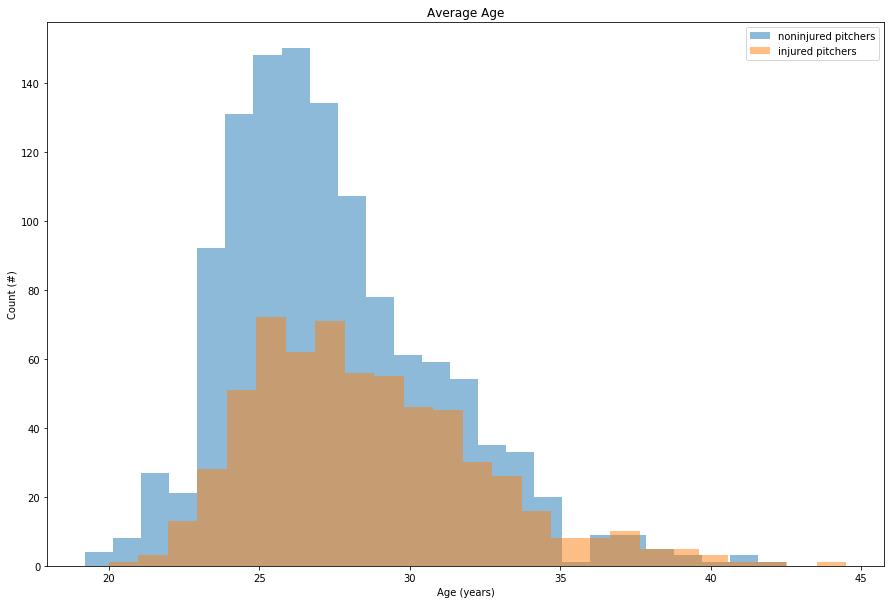

In [59]:
fig, ax = plt.subplots(figsize = (15,10))

plt.hist(avg_noinj['age'], bins=25, alpha=.5)
plt.hist(avg_inj['age'], bins=25, alpha=.5)
ax.legend(['noninjured pitchers', 'injured pitchers'])
plt.title('Average Age')
plt.xlabel('Age (years)')
plt.ylabel('Count (#)')
plt.show()

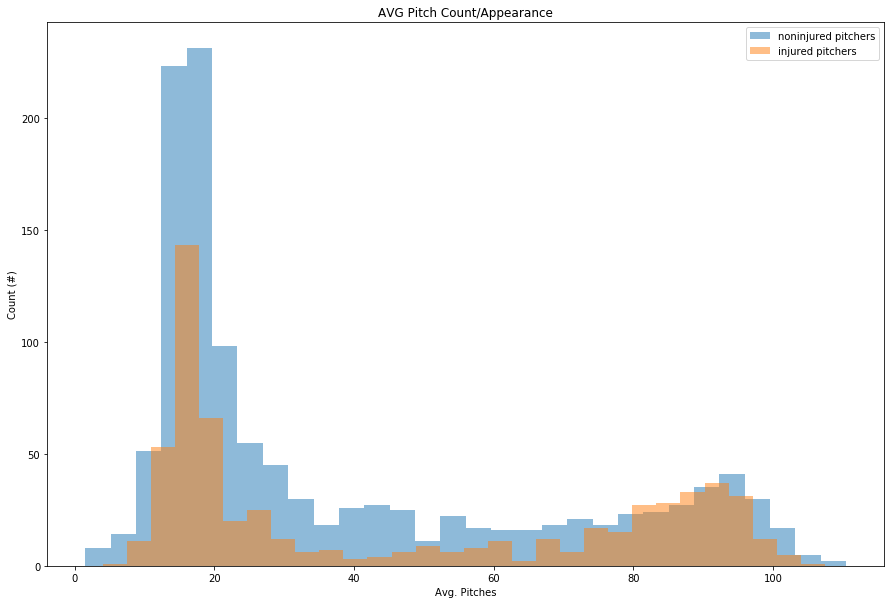

In [65]:
fig, ax = plt.subplots(figsize = (15,10))

plt.hist(avg_noinj['pit'], bins=30, alpha=.5)
plt.hist(avg_inj['pit'], bins=30, alpha=.5)
ax.legend(['noninjured pitchers', 'injured pitchers'])
plt.title('AVG Pitch Count/Appearance')
plt.xlabel('Avg. Pitches')
plt.ylabel('Count (#)')
plt.show()

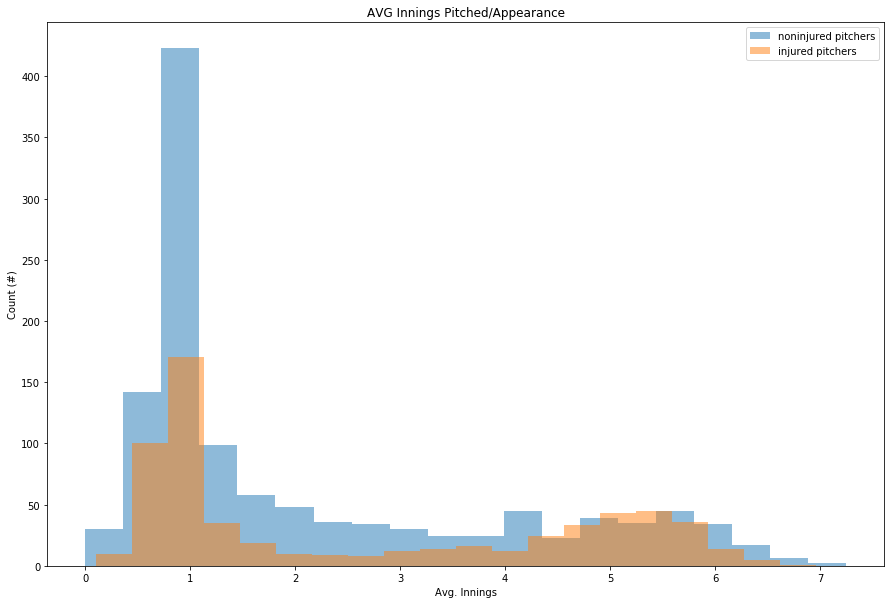

In [69]:
fig, ax = plt.subplots(figsize = (15,10))

plt.hist(avg_noinj['ip'], bins=20, alpha=.5)
plt.hist(avg_inj['ip'], bins=20, alpha=.5)
ax.legend(['noninjured pitchers', 'injured pitchers'])
plt.title('AVG Innings Pitched/Appearance')
plt.xlabel('Avg. Innings')
plt.ylabel('Count (#)')
plt.show()